# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# Importa a biblioteca Patsy e cria as matrizes de design para o modelo de regressão
# 'tip ~ sex + smoker + time + net_bill + 1' define a variável dependente e as independentes
# O operador '+ 1' inclui o intercepto no modelo
import patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
# Ajusta um modelo de Regressão Linear (OLS) com as matrizes de design criadas anteriormente
# 'y' é a variável dependente e 'X' são as variáveis independentes
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        21:22:55   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1.R-quadrado e R-quadrado ajustado:


* **R-quadrado**: 0,335: O modelo explica cerca de 33,5% da variabilidade da variável dependente (tip). Isso significa que 33,5% da variação nas gorjetas pode ser explicada pelas variáveis independentes incluídas no modelo.


* **R-quadrado** ajustado: 0,324: Este valor ajusta o R-quadrado para o número de variáveis no modelo e o tamanho da amostra. A proximidade do valor ajustado com o R-quadrado simples sugere que o modelo não está superajustado.

#### 2. Estatística F e Probabilidade F:


* **F-statistic**: 30.13 e Prob (F-statistic): 2.64e-20: Esses valores indicam que o modelo como um todo é altamente significativo. A probabilidade associada à estatística F é praticamente zero, o que significa que pelo menos uma das variáveis independentes tem um efeito significativo na variável dependente.


#### 3. Coeficientes (coef), Erros padrão (std err) e p-values (P>|t|):


* **Intercepto**: O valor do intercepto é 1,1999, o que significa que, em média, a gorjeta esperada quando todas as variáveis independentes são zero é aproximadamente 1,20.


* **sex[T.Female]**: O coeficiente de -0,0034 sugere que o sexo não tem um efeito significativo nas gorjetas, com um p-value de 0,982, muito maior que 0,05.


* **smoker[T.No]**: O coeficiente de 0,1405 sugere que não fumar pode aumentar as gorjetas em média, mas o p-value de 0,352 indica que esse efeito não é estatisticamente significativo.


* **time[T.Dinner]**: O coeficiente de 0,0584 sugere que o jantar pode aumentar a gorjeta, mas com um p-value de 0,729, essa variável também não é significativa.


* **net_bill**: O coeficiente de 0,0995 é altamente significativo (p-value de 0,000), indicando que o valor da conta líquida (sem gorjeta) tem um impacto forte e positivo nas gorjetas. Para cada aumento de 1 unidade no valor da conta, a gorjeta aumenta em 0,0995.


#### 4. Estatísticas de diagnóstico:

* **Omnibus e Prob(Omnibus)**: A estatística de Omnibus testa a normalidade dos resíduos. Com um valor de 36,537 e um p-value de 0,000, há evidência de que os resíduos não seguem uma distribuição normal, o que pode indicar problemas com a suposição de normalidade do erro.


* **Durbin-Watson**: 2,121: Isso testa a presença de autocorrelação nos resíduos. Um valor próximo de 2, como aqui, sugere que não há autocorrelação significativa.


* **Jarque-Bera (JB) e Prob(JB)**: Testa a normalidade dos resíduos. Com um valor de 65,875 e p-value de 4.96e-15, também sugere que os resíduos não são normalmente distribuídos.


* **Skew**: 0,800 e Kurtosis: 4,980: O valor de skew (assimetria) e kurtosis (curtose) indicam que os resíduos são ligeiramente assimétricos e com caudas mais pesadas que a distribuição normal.


#### 5. Cond. No. (Número de Condicionamento):


* **Cond. No. 71.2**: Este valor avalia a multicolinearidade entre as variáveis. Um valor muito alto (geralmente > 30) pode indicar problemas de multicolinearidade, mas 71,2 é um valor moderado, sugerindo que a multicolinearidade não é um grande problema no modelo.

#### Conclusão:


* O modelo é globalmente significativo, conforme indicado pela estatística F.


* A única variável estatisticamente significativa é net_bill, o que indica que o valor da conta líquida é um bom preditor da gorjeta.


* As variáveis sexo, fumante e hora do dia (almoço ou jantar) não são estatisticamente 
significativas, o que sugere que não influenciam significativamente as gorjetas neste modelo.


* Há alguns sinais de que os resíduos não seguem perfeitamente a suposição de normalidade (Omnibus, Jarque-Bera), mas isso pode ser aceitável dependendo do contexto da análise.

In [5]:
# criando a martiz desing apenas com a variável de interesse
y, X = patsy.dmatrices('tip ~  net_bill + 1', tips)
X

DesignMatrix with shape (244, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [214 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

In [6]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        21:22:55   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# criando a martiz desing apenas com a variável de interesse e transformando para np_log
y, X = patsy.dmatrices('tip ~  np.log(net_bill) + 1', tips)
X

DesignMatrix with shape (244, 2)
  Intercept  np.log(net_bill)
          1           2.77134
          1           2.16102
          1           2.86277
          1           3.01406
          1           3.04357
          1           3.02432
          1           1.91250
          1           3.16800
          1           2.57108
          1           2.44669
          1           2.14710
          1           3.40983
          1           2.62829
          1           2.73631
          1           2.46895
          1           2.87130
          1           2.15871
          1           2.53211
          1           2.60046
          1           2.85071
          1           2.62756
          1           2.86448
          1           2.60565
          1           3.46072
          1           2.81181
          1           2.73890
          1           2.43098
          1           2.36931
          1           2.85647
          1           2.81241
  [214 rows omitted]
  Terms:
    'In

In [8]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.40e-20
Time:                        21:22:55   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e uma polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [10]:
# Importa a biblioteca Patsy e cria as matrizes de design para o modelo de regressão
# 'tip ~ sex + smoker + time + net_bill + 1' define a variável dependente e as independentes
# O operador '+ 1' inclui o intercepto no modelo
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [11]:
# Ajusta um modelo de Regressão Linear (OLS) com as matrizes de design criadas anteriormente
# 'y' é a variável dependente e 'X' são as variáveis independentes
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.21e-18
Time:                        21:22:56   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'residuo vs. net_bill')

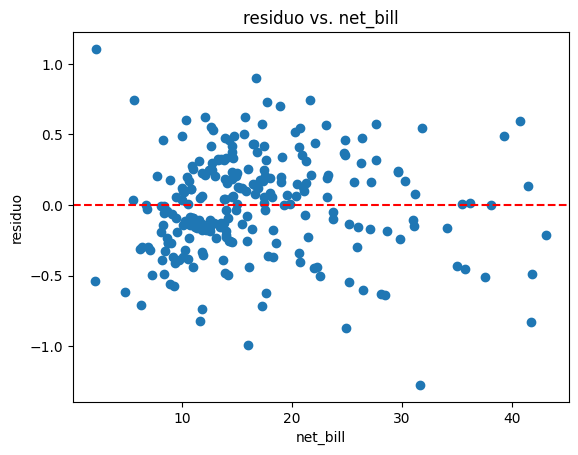

In [12]:
import matplotlib.pyplot as plt

# calculando o resíduo
residuals = modelo.resid

# Gráfico de resíduos vs. net_bill
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('residuo')
plt.title('residuo vs. net_bill')

In [13]:
# removendo variáveis com p-value < 0.05
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill) + 1', tips)  
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           5.62e-22
Time:                        21:22:56   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'residuo vs. net_bill')

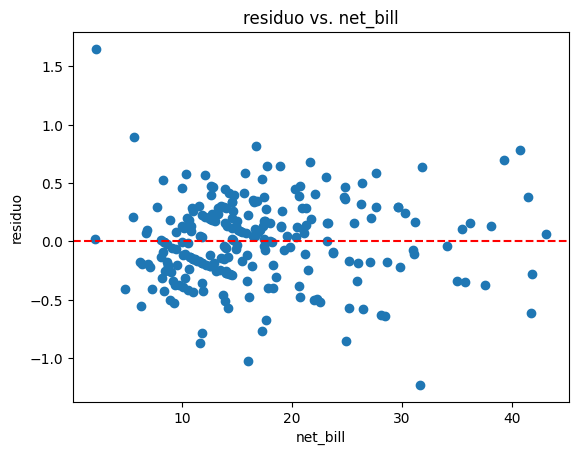

In [14]:
# calculando o resíduo
residuals = modelo.resid

# Gráfico de resíduos vs. net_bill
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('residuo')
plt.title('residuo vs. net_bill')

In [15]:
# polinomio de ordem 2 em net_bill
y, X = patsy.dmatrices('tip_pct ~ net_bill + I(net_bill ** 2)', tips)

# ajuste o modelo OLS
modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.06e-09
Time:                        21:22:56   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
I(net_bill ** 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'residuo vs. net_bill')

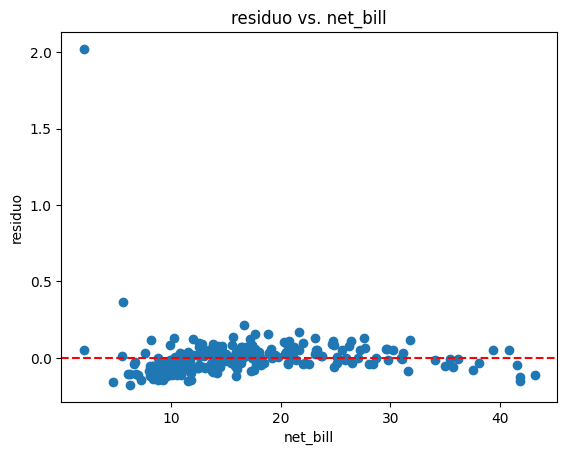

In [16]:
# calculando o resíduo
residuals = modelo.resid

# Gráfico de resíduos vs. net_bill
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('residuo')
plt.title('residuo vs. net_bill')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [17]:
# importando  o df
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [18]:
# Remover linhas com valores ausentes em 'tempo_emprego' ou 'renda'
df_clean = df[['tempo_emprego', 'renda']].dropna()

In [19]:
# criando uma matriz design com a  variável resposta e explicativa
y, X = patsy.dmatrices('renda ~ tempo_emprego +1', df_clean)

# ajuste o modelo OLS
modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:57   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

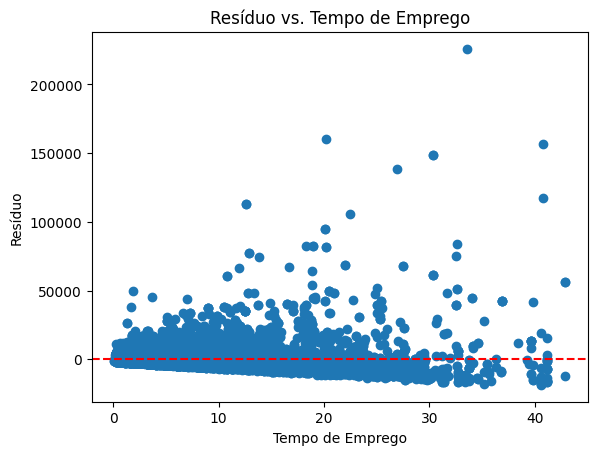

In [20]:
# Calculando os resíduos
residuals = modelo.resid

# Gráfico de resíduos vs. tempo_emprego (correto)
plt.scatter(df_clean['tempo_emprego'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduo')
plt.title('Resíduo vs. Tempo de Emprego')
plt.show()


In [21]:
# criando uma matriz design com a  variável resposta e explicativa
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + 1', df_clean)

# ajuste o modelo OLS
modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:57   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

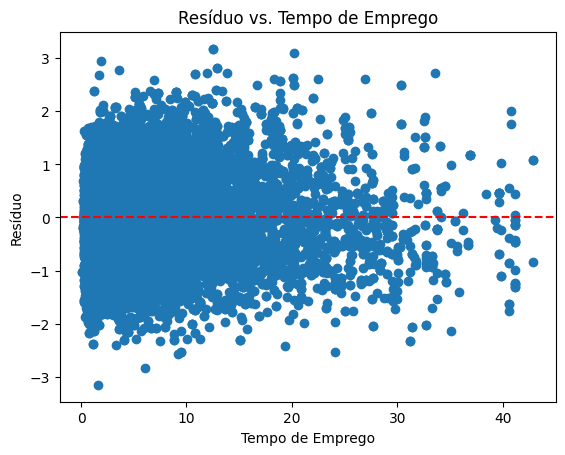

In [22]:
# Calculando os resíduos
residuals = modelo.resid

# Gráfico de resíduos vs. tempo_emprego (correto)
plt.scatter(df_clean['tempo_emprego'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduo')
plt.title('Resíduo vs. Tempo de Emprego')
plt.show()


* R2: Explica a proporção da variância da variável resposta (renda) que é explicada pela variável explicativa (tempo_emprego). Um valor de 0.171 indica que aproximadamente 17,1% da variação da renda é explicada pelo tempo de emprego.

* Esse é o valor estimado do logaritmo da renda quando o tempo_emprego é zero. Como estamos usando o log de renda, o coeficiente da constante representa a expectativa da renda inicial, antes de considerar o tempo de emprego.


* Para voltar ao valor da renda original, você pode aplicar a exponenciação: 𝑒7.8384 ≈ 2547 e7.8384 ≈ 2547. Isso significa que, para um tempo de emprego zero, a renda prevista seria em torno de R$ 2.547.

* O p-valor para o coeficiente de tempo_emprego é 0.000. Isso indica que o tempo_emprego tem uma relação estatisticamente significativa com a renda (p-valor menor que 0.05), ou seja, é improvável que o efeito observado seja devido ao acaso.

* F-statistic = 2564 com um p-valor 0.00 indica que o modelo geral é significativo. Isso significa que o modelo com tempo_emprego explica a renda melhor do que um modelo sem nenhuma variável explicativa.

#### Conclusão:


O modelo mostra que há uma relação significativa entre tempo_emprego e renda, mas o R2 indica que o tempo_emprego sozinho explica apenas uma pequena parte da variância na renda. Para melhorar o modelo, você pode considerar incluir outras variáveis explicativas (como discutido anteriormente) ou realizar transformações adicionais.

In [23]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [24]:
# Remover linhas com valores ausentes em 'tempo_emprego' ou 'renda'
df_clean2 = df[['tempo_emprego', 'renda',  'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','tipo_renda', 'educacao','estado_civil', 
               'tipo_residencia', 'idade', 'qt_pessoas_residencia']].dropna()

In [25]:
# criando uma matriz design com a variável resposta e explicativas
y, X = patsy.dmatrices('renda ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', df_clean2)

# ajuste o modelo OLS
modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:57   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [26]:
# criando uma matriz design com a  variável resposta e explicativa
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + sexo + posse_de_imovel + idade + 1', df_clean2)

# ajuste o modelo OLS
modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:22:58   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2790      0.031    233.591      0.000       7.218       7.340
sexo[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
posse_de_imovel[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
tempo_emprego               0.0610      0.001     59.110      0.000       0.059       0.063
idade                       0.0042      0.001      5.635      0.000       0.003       0.006
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A análise de resíduos e a avaliação da qualidade do ajuste indicam que, embora o modelo tenha significância estatística, a explicação da variabilidade da renda não é muito forte. Além disso, os resíduos parecem atender às suposições da regressão linear, sugerindo que o modelo é razoavelmente adequado